In [37]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

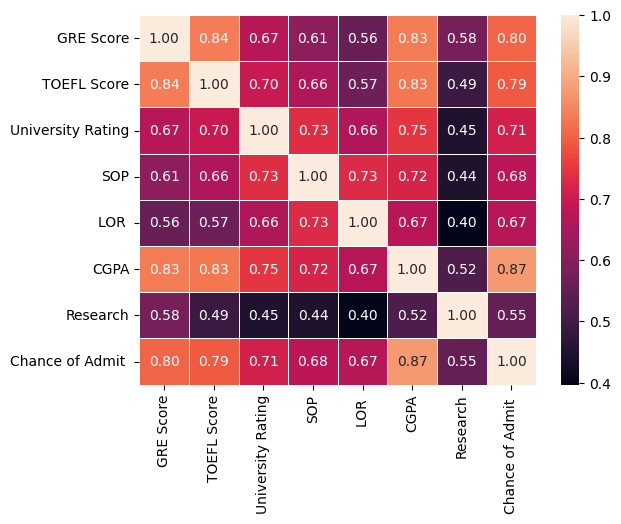

In [15]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True, fmt=".2f")
plt.show()

1) С целевым признаком "Chance of Admit" наиболее коррелируют признаки "CGPA", "GRE Score" , "TOEFL Score". При построении модели машинного обучения перечисленные признаки будут наиболее информативными.

2) Стоит отметить корреляцию признаков "SOP" и "University Rating".

3) Можно построить модель машинного обучения на основе признаков "CGPA", "GRE Score", "TOEFL Score", "LOR", "Research". Первые 3 признака наиболее сильно повлияют на результат ввиду их высокой корреляции. Обученные модели позволят бакалаврам оценить свои возможности для поступления на магистратуру.

## Разделение данных
Разделим данные на целевой столбец и признаки
При построении предсказательных моделей исходные данные обычно разбиваются на обучающую ("training set") и контрольную ("test set") выборки. 
**Обучающая выборка** используется для построения математических отношений между некоторой переменной-откликом и предикторами, тогда как **контрольная (= "проверочная")** выборка служит для получения оценки прогнозных свойств модели на новых данных, т.е. данных, которые не были использованы для обучения модели.


In [28]:
X = df.drop(['Chance of Admit '], axis=1) #Наименования признаков
y = df['Chance of Admit '] # Значения признаков


In [29]:
# кодируем категориальные данные из строк в числа
le = LabelEncoder()
y = le.fit_transform(y)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False, random_state= 45)

In [31]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((320, 7), (320,))

In [32]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((80, 7), (80,))

### Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.

In [61]:
# Задаем значение K
K = 100

# Создаем объект классификатора
knn = KNeighborsClassifier(n_neighbors=K)

# Обучаем модель на тренировочных данных
knn.fit(X_train, y_train)

# Предсказываем метки классов для тестовых данных
y_pred = knn.predict(X_test)

# Вычисляем точность модели с помощью 5-кратной кросс-валидации
scores = cross_val_score(knn, X, y, cv=5)

# Выводим среднее значение и стандартное отклонение точности
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.10 (+/- 0.05)


In [62]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("mean_squared_error:",
          mean_squared_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [63]:
test_model(knn)

mean_absolute_error: 6.175
mean_squared_error: 80.65
median_absolute_error: 3.5
r2_score: 0.6251016850668216


Mean_absolute_error (MAE) - средняя абсолютная ошибка, которая показывает насколько сильно отличаются фактические значения от предсказанных. Значение MAE равно 6.175, что означает, что средняя ошибка предсказания составляет 6.175.

Mean_squared_error (MSE) - средняя квадратичная ошибка, которая выражает среднюю величину квадрата отклонения предсказанных значений от фактических. Значение MSE равно 80.65, что говорит о том, что среднеквадратичная ошибка составляет 80.65.

Median_absolute_error - медианная абсолютная ошибка, которая показывает, насколько сильно медианные значения отличаются от предсказанных. Значение median_absolute_error равно 3.5.

R2_score - коэффициент детерминации, который измеряет, насколько хорошо модель соответствует данным. Значение R2_score равно 0.6251016850668216, что говорит о том, что модель объясняет 62.51% дисперсии данных.

Из полученных значений можно сделать вывод о том, что модель не является идеальной и имеет ошибки в предсказании. Однако, коэффициент детерминации показывает, что модель в некоторой степени соответствует данным. При необходимости можно произвести дополнительную настройку модели для улучшения ее качества.

### Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.

In [49]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

# Создаем объект KFold с n_splits=5
kf = KFold(n_splits=5)

# Создаем объект StratifiedKFold с n_splits=5
skf = StratifiedKFold(n_splits=5)

# Создаем объект LeaveOneOut
loo = LeaveOneOut()

# Вычисляем точность модели с помощью KFold кросс-валидации
scores_kf = cross_val_score(knn, X, y, cv=kf)

# Вычисляем точность модели с помощью StratifiedKFold кросс-валидации
scores_skf = cross_val_score(knn, X, y, cv=skf)

# Вычисляем точность модели с помощью LeaveOneOut кросс-валидации
scores_loo = cross_val_score(knn, X, y, cv=loo)


In [50]:
print("KFold:", scores_kf.mean())
print("StratifiedKFold:", scores_skf.mean())
print("LeaveOneOut:", scores_loo.mean())


KFold: 0.0625
StratifiedKFold: 0.0975
LeaveOneOut: 0.07


Каждый метод кросс-валидации имеет свой результат. Наиболее точным оказался метод StratifiedKFold с показателем 0.0975, что может свидетельствовать о наличии дисбаланса классов в данных. LeaveOneOut показал близкий результат к StratifiedKFold, но может быть менее эффективен при большом объеме данных из-за вычислительной сложности. KFold оказался наименее точным методом, что может быть связано с тем, что он не учитывает распределение классов в данных.

### Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# создаем модель KNN
knn = KNeighborsClassifier()

# задаем сетку параметров для перебора
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# создаем объект GridSearchCV с кросс-валидацией на 5 фолдах
grid_search = GridSearchCV(knn, param_grid, cv=5)

# обучаем модель на данных
grid_search.fit(X_train, y_train)

# выводим лучшее значение гиперпараметра K и соответствующую ему оценку качества модели
print("лучшие значение гиперпараметра K: ", grid_search.best_params_)
print("оценка качества модели: ", grid_search.best_score_)


Best parameter:  {'n_neighbors': 11}
Best score:  0.075


### Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.

In [56]:
# Задаем значение K
K = 11

# Создаем объект классификатора
knn = KNeighborsClassifier(n_neighbors=K)

# Обучаем модель на тренировочных данных
knn.fit(X_train, y_train)

# Предсказываем метки классов для тестовых данных
y_pred = knn.predict(X_test)

# Вычисляем точность модели с помощью 5-кратной кросс-валидации
scores = cross_val_score(knn, X, y, cv=5)

# Выводим среднее значение и стандартное отклонение точности
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.07 (+/- 0.03)


In [57]:
test_model(knn)

mean_absolute_error: 7.2375
mean_squared_error: 97.4625
median_absolute_error: 5.5
r2_score: 0.5469494479953516


Вывод говорит о том, что модель имеет среднюю абсолютную ошибку (mean_absolute_error) в 7.24 единицы и среднеквадратичную ошибку (mean_squared_error) в 97.46 единицы. 

Медианная абсолютная ошибка (median_absolute_error) составляет 5.5 единицы. 

Коэффициент детерминации (r2_score) равен 0.55, что говорит о том, что модель объясняет примерно половину изменчивости данных. 



### Постройте кривые обучения и валидации.

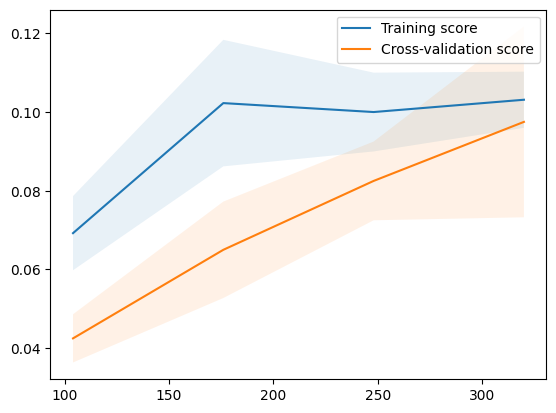

In [65]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1)

plt.legend()
plt.show()


Интерпретация кривых обучения и валидации:

Кривые обучения и валидации сходятся на достаточно высоком уровне, это говорит о том, что модель может быть улучшена путем использования большего количества данных.

